In [103]:
import numpy as np
import matplotlib.pyplot as plt

test = True

In [104]:
filename = "test.txt" if test else "input.txt"
with open(filename) as f:
    lines = f.readlines()
elv_map_raw = np.array([list(line.strip()) for line in lines])
loc_to_ple = lambda loc: tuple([x[0] for x in loc])

start_pos = loc_to_ple(np.where(elv_map_raw == "S"))
target_pos = loc_to_ple(np.where(elv_map_raw == "E"))
if test:
    print(elv_map_raw, start_pos, target_pos)

In [105]:
value_replacer = lambda x: 0 if x == "S" else (25 if x == "E" else ord(x) - 97)
value_replacer = np.vectorize(value_replacer)
elv_map = value_replacer(elv_map_raw)
if test:
    plt.imshow(elv_map, interpolation=None)

In [106]:
def find_reachable(elv_map, pos):
    current = elv_map[pos]
    reachable = []
    for offset in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
        loc = pos[0] + offset[0], pos[1] + offset[1]
        try:
            if elv_map[loc] <= current + 1 and loc[0] >= 0 and loc[1] >= 0:
                reachable.append((loc))
        except IndexError:
            pass
    return reachable

In [157]:
def find_path():
    paths = [[start_pos]]
    visited = []
    for i in range(1000):
        if test:
            print(f"{paths = }")
        paths_new = []
        for path in paths:
            locs_temp = find_reachable(elv_map, path[-1])
            for loc in locs_temp:
                if loc in visited:
                    continue
                visited.append(loc)
                path_new = path + [loc]
                if loc == target_pos:
                    print(f"found path with  {len(path_new)-1} steps \n", path_new)
                    return path_new
                paths_new.append(path_new)
        paths = paths_new


path = find_path()  # 340 too high 335 too low

found path with  339 steps 
 [(20, 0), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (26, 2), (26, 3), (26, 4), (26, 5), (26, 6), (26, 7), (26, 8), (27, 8), (27, 9), (27, 10), (27, 11), (27, 12), (27, 13), (27, 14), (27, 15), (27, 16), (27, 17), (27, 18), (27, 19), (27, 20), (26, 20), (26, 21), (26, 22), (25, 22), (24, 22), (24, 23), (24, 24), (24, 25), (24, 26), (24, 27), (24, 28), (24, 29), (25, 29), (26, 29), (27, 29), (28, 29), (29, 29), (29, 30), (30, 30), (30, 31), (31, 31), (31, 32), (32, 32), (32, 33), (32, 34), (32, 35), (33, 35), (33, 36), (33, 37), (33, 38), (34, 38), (34, 39), (35, 39), (36, 39), (37, 39), (38, 39), (38, 40), (39, 40), (39, 41), (39, 42), (39, 43), (39, 44), (39, 45), (39, 46), (39, 47), (40, 47), (40, 48), (40, 49), (40, 50), (40, 51), (39, 51), (38, 51), (37, 51), (36, 51), (35, 51), (35, 50), (35, 49), (35, 48), (35, 47), (35, 46), (35, 45), (35, 44), (35, 43), (35, 42), (35, 41), (34, 41), (34, 40), (33, 40), (33, 39), (32, 39), (32, 38

In [129]:
if not path[-1] == target_pos: print("Path does't end at target")
prev = 0
for step in path:
    curr = elv_map[step]
    if not curr <= prev + 1:
        print('illegal move')
        break
    prev = curr

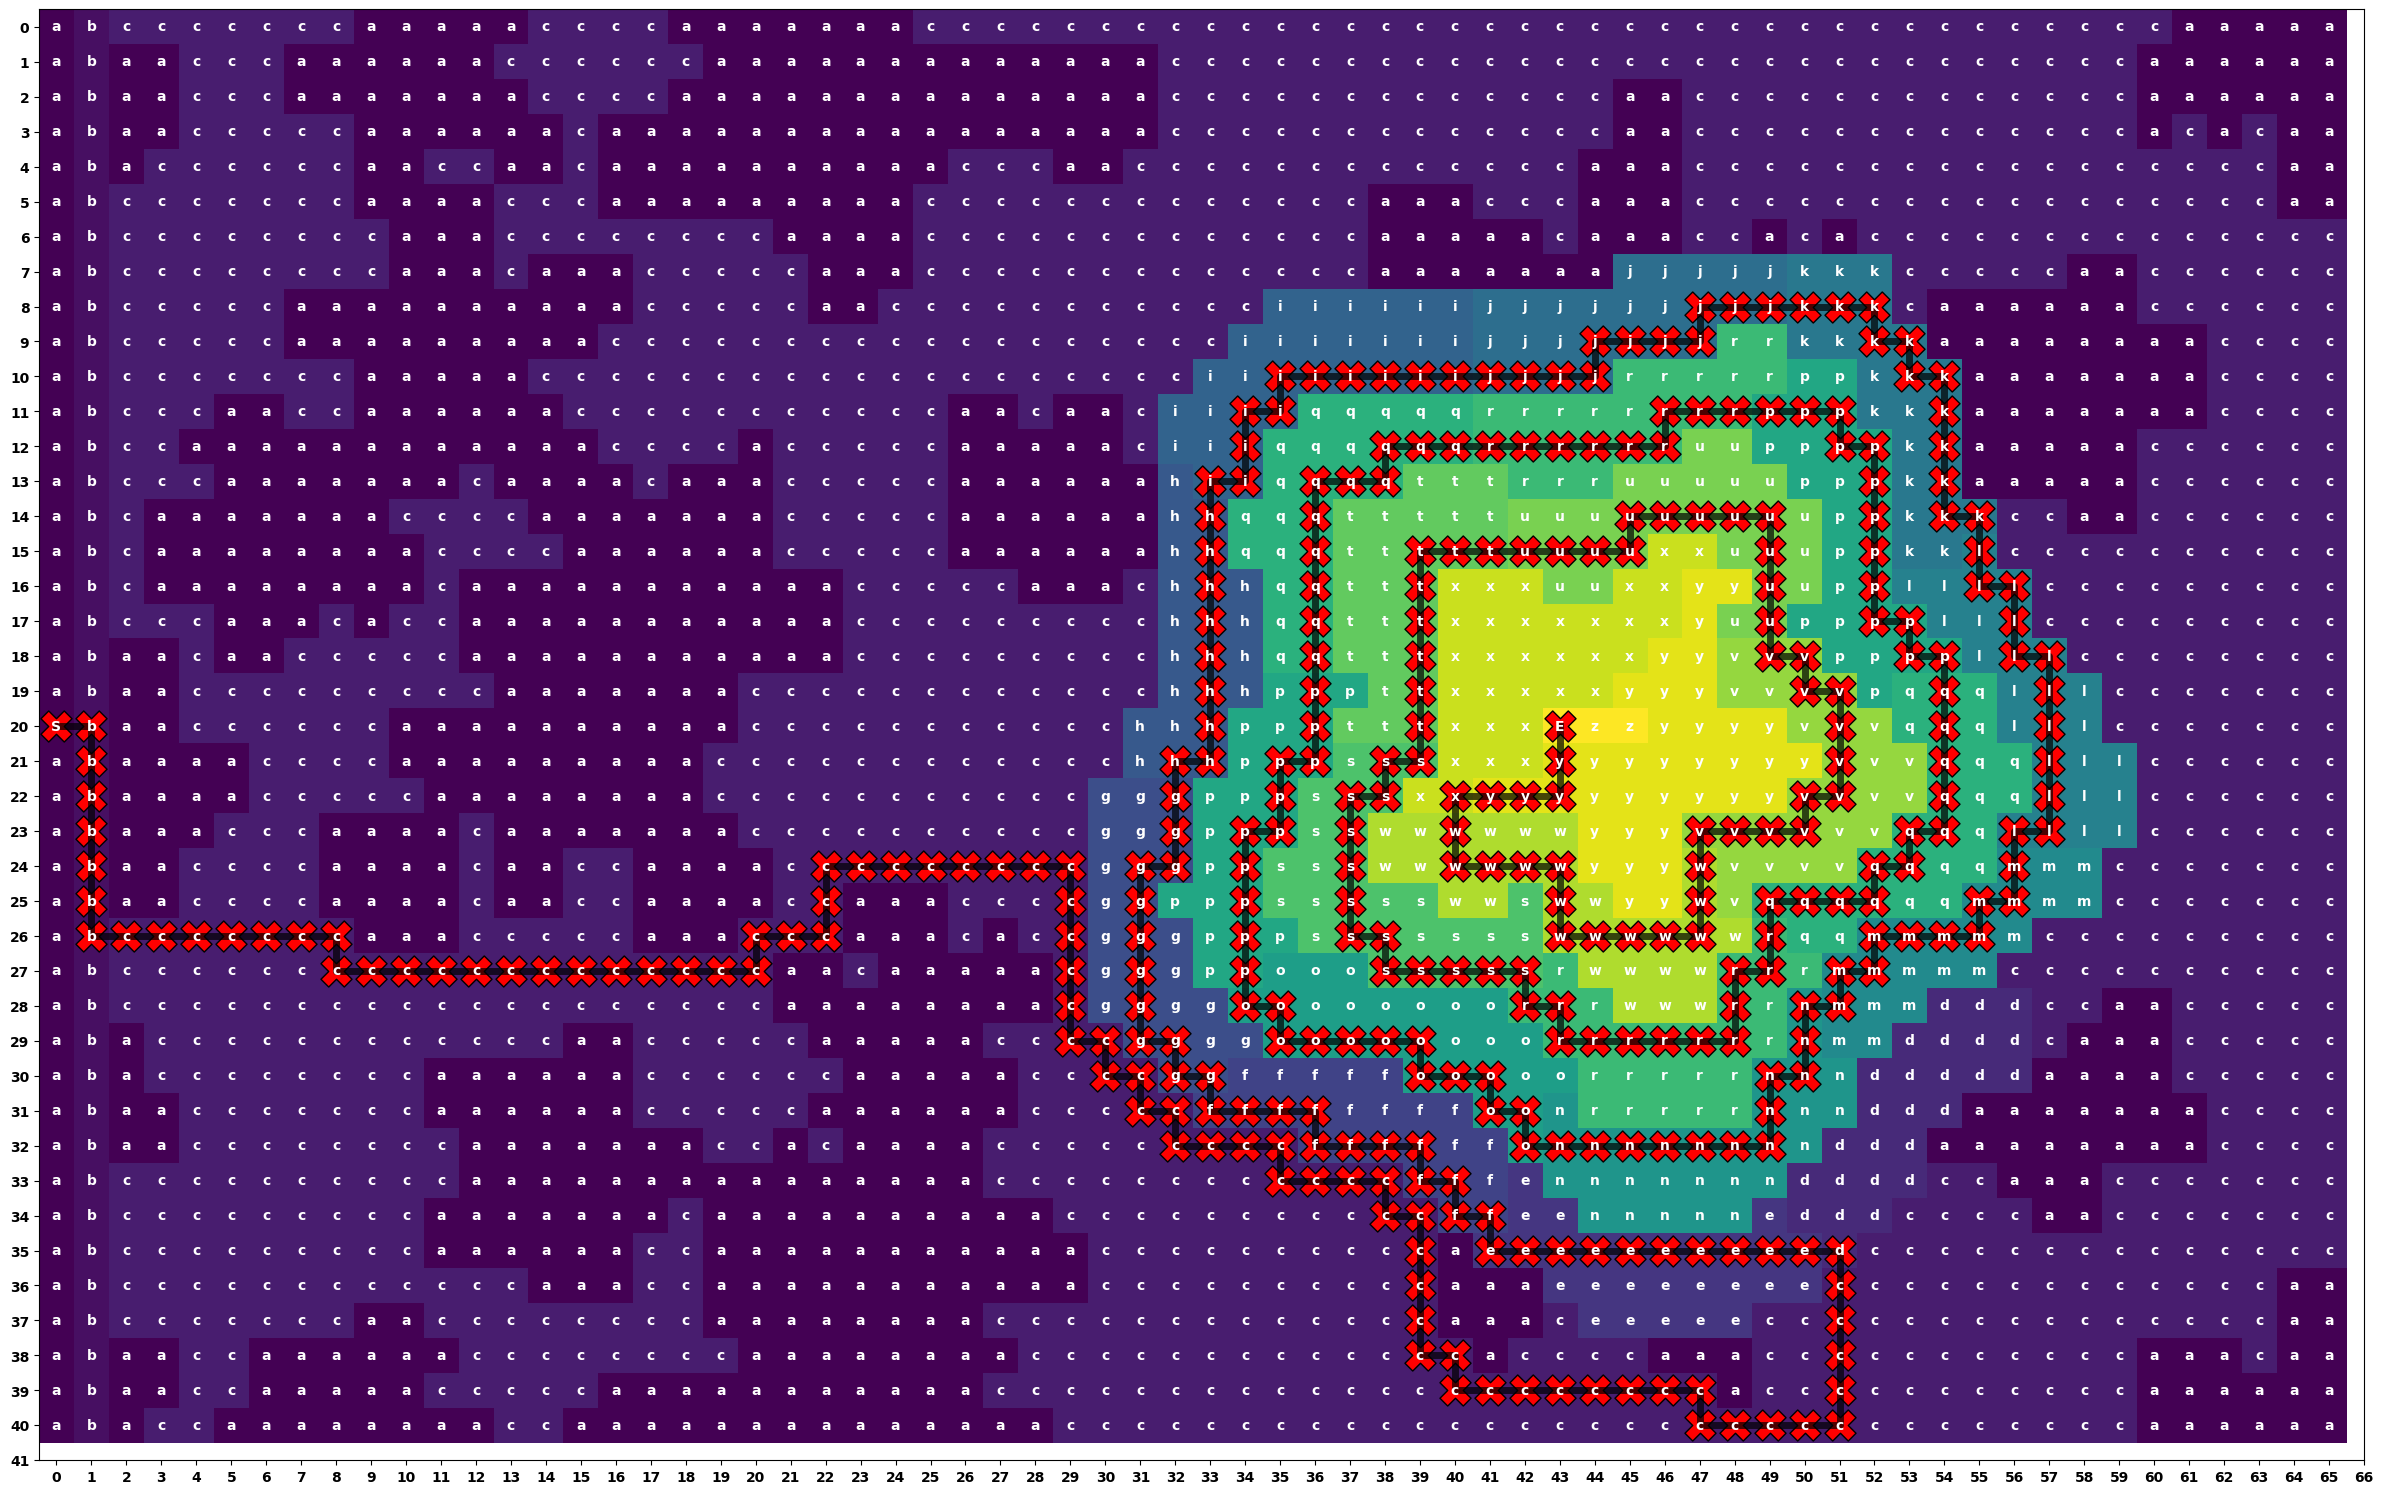

In [155]:
_ = plt.figure(figsize=(30, 30))
_ = plt.imshow(elv_map, interpolation='antialiased', norm='linear')
path_x = [x for (y, x) in path]
path_y = [y for (y, x) in path]
_ = plt.plot(path_x, path_y, lw=5, c="black", alpha=0.7)
_ = plt.scatter(path_x, path_y, marker="X", facecolor="red", edgecolor="black", s=500)
_=plt.xticks([*range(elv_map.shape[1]+1)])
_=plt.yticks([*range(elv_map.shape[0]+1)])
# plt.grid()
for i in range((elv_map.shape[0])):
    for j in range((elv_map.shape[1])):
        text = plt.text(j, i, elv_map_raw[i, j],
                       ha="center", va="center", color="w")